# Part II - Ford GoBike Trips Analysis
## by KADI Amir Khalid





## Investigation Overview

> Today I want to investegate Ford GoBike dataset to determine the caracteristics of trips in term of duration, gender, user type and so more.


## Dataset Overview

> Ford GoBike System Data: This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area with +180k instances.

In [1]:
#!pip install -U pandas

In [2]:
#!pip install -U seaborn

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
# load in the dataset into a pandas dataframe
df1 = pd.read_csv('201902-fordgobike-tripdata.csv')
# Convert the start_time column to datetime format
df1['start_time'] = pd.to_datetime(df1['start_time'])

# Extract the hour from the start_time column
df1['start_hour'] = df1['start_time'].dt.hour

# Filter only the trips that happened during the day (between 6am and 9pm)
df1 = df1[(df1['start_hour'] >= 6) & (df1['start_hour'] <= 21)]

In [5]:
# convert user_type, member_gender, and bike_share_for_all_trip into categorical types.
to_convert = ['user_type', 'member_gender', 'bike_share_for_all_trip']
for column in to_convert:
    df1[column] = df1[column].astype('category')

In [6]:
df1['duration_min'] = (df1['duration_sec'] / 60).astype(int)


In [7]:
def count_plot(df1,x,default_color,xlabel,ylabel,title):
    '''Create the countplot using seaborn
        Input: dataframe,column,color,xlabel,ylabel,title
        Return countplot for the x column''' 
    sb.countplot(data=df1, x=x,color=default_color,order=df1[x].value_counts().index)

    # Set the plot labels
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    # Show the plot
    plt.show()

## Distribution of user type
Most of the members are subscribers

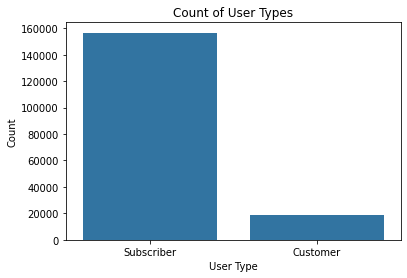

In [8]:
default_color = sb.color_palette()[0]
x='user_type'
xlabel="User Type"
ylabel="Count"
title="Count of User Types"
# Create the countplot using seaborn
count_plot(df1,x,default_color,xlabel,ylabel,title)

## Distribution of member gender
Most of the members are males

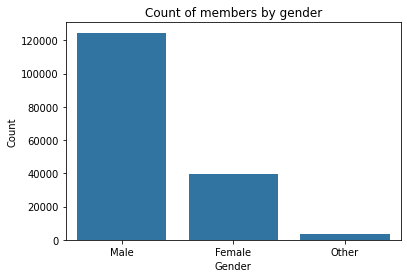

In [9]:
default_color = sb.color_palette()[0]
x='member_gender'
xlabel="Gender"
ylabel="Count"
title="Count of members by gender"
# Create the countplot using seaborn
count_plot(df1,x,default_color,xlabel,ylabel,title)

## Distribution of members age
Most of the members are between 26 and 35 years old

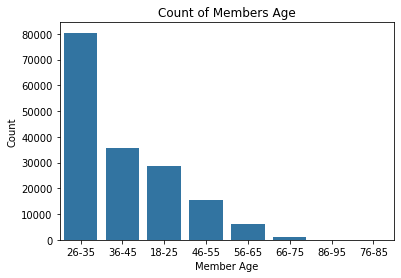

In [10]:
# Define the bin edges and labels
df1['member_age'] = 2019 - df1['member_birth_year']
bin_edges = [18, 25, 35, 45, 55, 65, 75, 85, 95]
bin_labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85', '86-95']

# Create a new column for member_age_range
df1['member_age_range'] = pd.cut(df1['member_age'], bins=bin_edges, labels=bin_labels)
x='member_age_range'
ylabel="Count"
xlabel="Member Age"
title="Count of Members Age"
# Create the countplot using seaborn
count_plot(df1,x,default_color,xlabel,ylabel,title)

In [11]:
def bar_plot(df1,x_groupby,default_color,xlabel,ylabel,title):
    '''Create the barplot using seaborn
    Input: dataframe,column,color,xlabel,ylabel,title
    Return barplot for the x column''' 
    station_counts = df1.groupby(x_groupby).size().reset_index(name='count')
    # Sort the results in descending order and select the top 10 stations
    top_stations = station_counts.sort_values(by='count', ascending=False).head(10)
    plt.figure(figsize=(15, 10))

    # Create the bar plot using seaborn
    sb.barplot(data=top_stations, y=x_groupby, x='count',color=default_color)

    # Set the plot labels
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)

    # Show the plot
    plt.show()

## Most popular stations

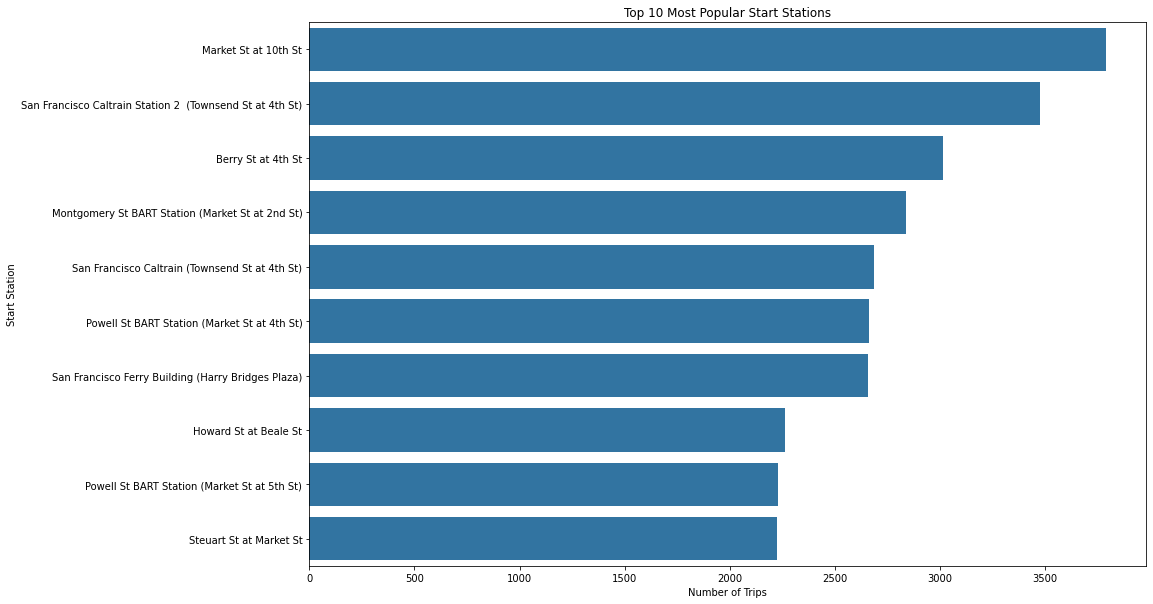

In [12]:
x_groupby = 'start_station_name'
ylabel= 'Start Station'
xlabel= 'Number of Trips'
title= 'Top 10 Most Popular Start Stations'
bar_plot(df1,x_groupby,default_color,xlabel,ylabel,title)

## Distribution of trips duration
To view the destribution of trips duration we need to aply log scale, Most of the trips have duration between 5 and 15 minutes

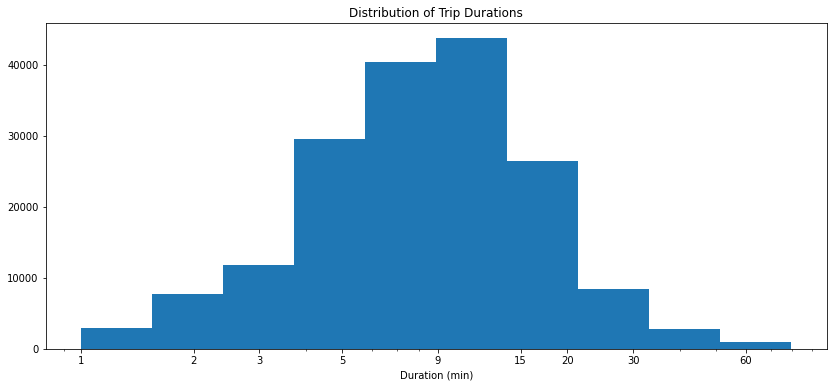

In [13]:

log_binsize = 0.19
bins = 10 ** np.arange(0.0, np.log10(60)+log_binsize, log_binsize)

# set plot dimensions
plt.figure(figsize=[14, 6])

plt.hist(data=df1, x='duration_min', bins=bins)
plt.title('Distribution of Trip Durations')
plt.xscale('log')
plt.xticks([1, 2, 3, 5, 9, 15, 20, 30, 60,], [1, 2, 3, 5, 9, 15, 20, 30, 60,])

plt.xlabel('Duration (min)')
plt.show()

## Distribution of trips during week days
Count of trips decreases on weekends

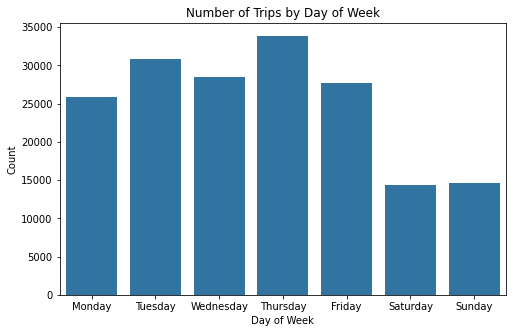

In [14]:
df1['start_week_day'] = df1['start_time'].dt.day_name()

# convert cut, color, and clarity into ordered categorical types
ordinal_var = {'start_week_day': ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']}


ordinal_type = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var['start_week_day'])
df1['start_week_day'] = df1['start_week_day'].astype(ordinal_type)
plt.figure(figsize=[8,5])
sb.countplot(data=df1, x='start_week_day', color=sb.color_palette()[0])
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.title('Number of Trips by Day of Week')
plt.show()

## Average trips duration for each user type
Customer has higher average trip duration than subscriber, but in order to get this result we need to remove the outliers

In [15]:
# Calculate the first and third quartiles of duration_sec
q1 = df1["duration_sec"].quantile(0.25)
q3 = df1["duration_sec"].quantile(0.75)

# Calculate the IQR of duration_sec
iqr = q3 - q1

# Define the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filter out the outliers of duration_sec
df1 = df1[(df1["duration_sec"] >= lower_bound) & (df1["duration_sec"] <= upper_bound)]

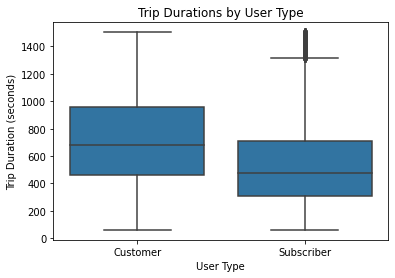

In [16]:
sb.boxplot(data=df1, x="user_type", y="duration_sec",color=default_color)

plt.title("Trip Durations by User Type")
plt.xlabel("User Type")
plt.ylabel("Trip Duration (seconds)")

plt.show()

## Mean members age by User Type during Hour of the Day & Week Days
Mean age decreases in the weekends and the end of the day for both user types

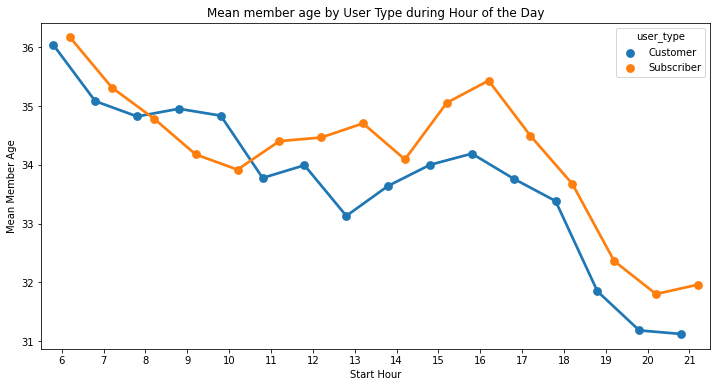

In [17]:
plt.figure(figsize=[12,6])
sb.pointplot(data=df1, x='start_hour', y='member_age', hue='user_type', dodge=0.4, ci=None)
plt.xlabel('Start Hour')
plt.ylabel('Mean Member Age')
plt.title('Mean member age by User Type during Hour of the Day')
plt.show()

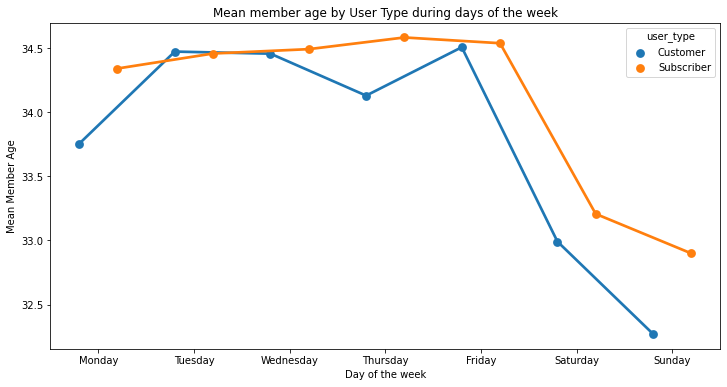

In [18]:
plt.figure(figsize=[12,6])
sb.pointplot(data=df1, x='start_week_day', y='member_age', hue='user_type', dodge=0.4, ci=None)
plt.xlabel('Day of the week')
plt.ylabel('Mean Member Age')
plt.title('Mean member age by User Type during days of the week')
plt.show()

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --template output-toggle.tpl --post serve

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 510004 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/